In [52]:
import pandas as pd
import numpy as np

In [53]:
data = {'birds': ['Cranes', 'Cranes', 'plovers', 'spoonbills', 'spoonbills', 'Cranes', 'plovers', 'Cranes', 'spoonbills', 'spoonbills', 'Cranes'], 
        'age': [3.5, 4, 1.5, np.nan, 6, 3, 5.5, np.nan, 8, 4, 3.5], 'visits': [2, 4, 3, 4, 3, 4, 2, 2, 3, 2, 2], 
        'priority': ['yes', 'yes', 'no', np.nan, 'no', 'no', 'no', 'yes', 'no', 'no','yes']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k']

df1 = pd.DataFrame(data = data, index = labels)

In [54]:
df1.info()
df1.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, a to k
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   birds     11 non-null     object 
 1   age       9 non-null      float64
 2   visits    11 non-null     int64  
 3   priority  10 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 440.0+ bytes


,age,visits
count,9.000000,11.000000
mean,4.333333,2.818182
std,1.903943,0.873863
min,1.500000,2.000000
25%,3.500000,2.000000
50%,4.000000,3.000000
75%,5.500000,3.500000
max,8.000000,4.000000


In [55]:
df1.iloc[::2]

,birds,age,visits,priority
a,Cranes,3.5,2,yes
c,plovers,1.5,3,no
e,spoonbills,6.0,3,no
g,plovers,5.5,2,no
i,spoonbills,8.0,3,no
k,Cranes,3.5,2,yes


In [56]:
df1[['birds', 'age']].iloc[[0,2,6]]

,birds,age
a,Cranes,3.5
c,plovers,1.5
g,plovers,5.5


In [57]:
df1[df1.visits<4]

,birds,age,visits,priority
a,Cranes,3.5,2,yes
c,plovers,1.5,3,no
e,spoonbills,6.0,3,no
g,plovers,5.5,2,no
h,Cranes,NaN,2,yes
i,spoonbills,8.0,3,no
j,spoonbills,4.0,2,no
k,Cranes,3.5,2,yes


In [58]:
df1[df1.age.isna() | df1.visits.isna()]

,birds,age,visits,priority
d,spoonbills,NaN,4,NaN
h,Cranes,NaN,2,yes


In [59]:
df1['age'] = df1['age'].fillna(df1['age'].mode()[0])
df1['visits'] = df1['visits'].fillna(df1['visits'].mode()[0])

In [60]:
df1[df1.birds == "Cranes"].visits.sum()

14

In [61]:
df1.birds.value_counts()

birds
Cranes        5
spoonbills    4
plovers       2
Name: count, dtype: int64

In [62]:
data = pd.read_csv(r'C:\Users\mahes\OneDrive\Desktop\My DSMP Journey\sessions files\ipl-matches.csv')
changed_name = {'Delhi Daredevils':'Delhi Capitals', 
                'Kings XI Punjab':'Punjab Kings',
                'Rising Pune Supergiants':'Rising Pune Supergiant'}
data.replace(changed_name.keys(), changed_name.values(), inplace=True)

<Axes: >

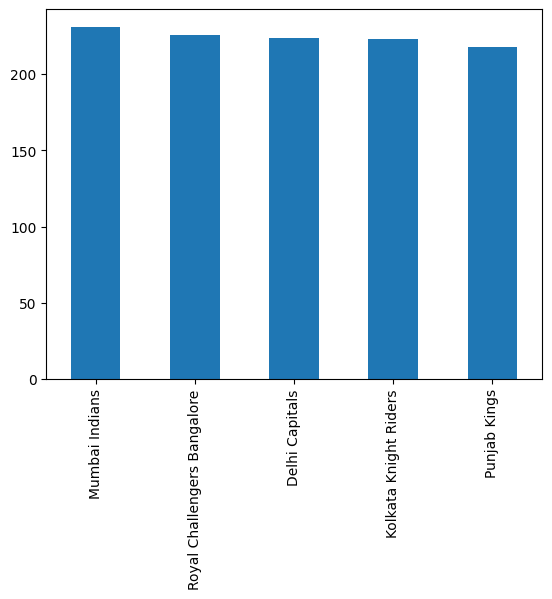

In [63]:
(data['Team1'].value_counts()+data["Team2"].value_counts()).sort_values(ascending=False).head().plot(kind='bar')

In [64]:
m1 = (data.Team1 == "Mumbai Indians") | (data.Team2 == "Mumbai Indians")
m2 = data.WinningTeam != "Mumbai Indians"
data[m1 & m2].Player_of_Match.value_counts().head(1)

Player_of_Match
SPD Smith    4
Name: count, dtype: int64

In [65]:
def team1_vs_team2(t1, t2):
    m1 = (data.Team1 == t1) | (data.Team2 == t1)  # Filter for matches where only t1 played
    m2 = (data.Team1 == t2) | (data.Team2 == t2)  # Filter for matches where only t2 played
    df1 = data[m1 & m2]
    print(df1.WinningTeam.value_counts())
    print(df1.Player_of_Match.value_counts().head(1))

team1_vs_team2('Kolkata Knight Riders','Chennai Super Kings')

WinningTeam
Chennai Super Kings      17
Kolkata Knight Riders     9
Name: count, dtype: int64
Player_of_Match
RA Jadeja    3
Name: count, dtype: int64


<Axes: xlabel='City'>

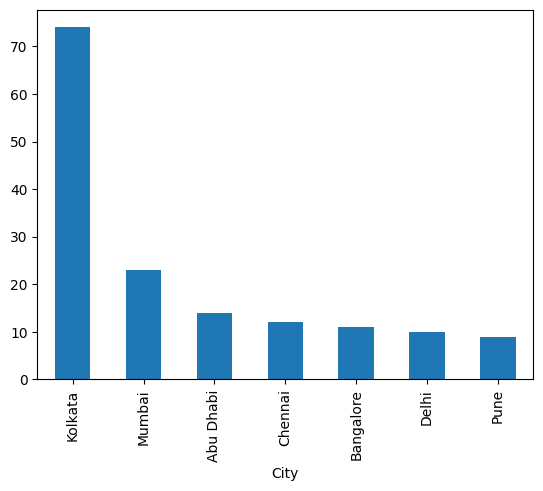

In [66]:
data[(data.Team1 == "Kolkata Knight Riders") | (data.Team2 == "Kolkata Knight Riders")].City.value_counts().head(7).plot(kind='bar')

In [67]:
data[((data.Team1 == "Mumbai Indians") | (data.Team2 == "Mumbai Indians")) & (data.Season == "2011")].Margin.mean()

19.25